### OBJECTIVE: CAN YOU PREDICT IF A CLIENT WILL SUBMIT A VEHICLE INSURANCE CLAIM IN THE NEXT 3 MONTHS WITHIN NIGERIA 

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from datetime import datetime
import datetime as dt


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

In [2]:
#import data
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

### DATA UNDERSTANDING

In [3]:
train.shape,test.shape

((12079, 14), (1202, 13))

In [4]:
train.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


In [5]:
train.describe()

,Age,No_Pol,target
count,12079.000000,12079.000000,12079.000000
mean,42.234539,1.307227,0.120457
std,97.492565,0.733085,0.325509
min,-6099.000000,1.000000,0.000000
25%,35.000000,1.000000,0.000000
50%,41.000000,1.000000,0.000000
75%,50.000000,1.000000,0.000000
max,320.000000,10.000000,1.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12079 non-null  object
 1   Policy Start Date       12079 non-null  object
 2   Policy End Date         12079 non-null  object
 3   Gender                  11720 non-null  object
 4   Age                     12079 non-null  int64 
 5   First Transaction Date  12079 non-null  object
 6   No_Pol                  12079 non-null  int64 
 7   Car_Category            8341 non-null   object
 8   Subject_Car_Colour      5117 non-null   object
 9   Subject_Car_Make        9603 non-null   object
 10  LGA_Name                5603 non-null   object
 11  State                   5591 non-null   object
 12  ProductName             12079 non-null  object
 13  target                  12079 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 1.3+ MB


In [7]:
train.columns

Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target'],
      dtype='object')

__HYPOTHESIS FOR OUR PREDICTIONS__

1. Is there a relationship between gender and an insurance claim?
2. Is there a relationship between age and a car insurance claim?
3. Does no of policies an individual have affect the insurance claim?
4. Does the car category affect the insurance claim?
5. Does the car make affect the insurance claim?
6. Does city of the car affect the insurance claim?
7. Does state of the car affect the insurance claim?
8. Does the insurance policy affect the insurance claim?

__TRYING TO ANSWER THE HYPOTHESIS BASED ON GENERAL KNOWLEDGE__

1. Not for a fact but males get into most car accidents as compared to females. So more males are expected to submit a policy claim in the next 3 months
2. Not for a fact but people under the ages of 30 tend to be involved in most car accidents as compared to people over the age of 30. So more people under the age of 30 are expected to submit an insurance claim in the next three months 
3. The car category is a major factor on the cost one pays to insure it. Different types of vehicles would have different insurance
4. The car make is a major factor on the cost one pays to insure it. Different types of vehicles would have different insurance
5. Some states and cities may involve a higher rate of theft and accidents hence location may be a factor to consider. Some locations will have more insurance claims within the next three months as compared to others
6. Not for a fact but insurance name can't affect the chance of an insurance claim 

In [8]:
train.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### DATA CLEANING

1. Check for missing values in train data and deal with them. For categorical columns that contain null values use mode or median to impute while impute numerical values using mean 

In [9]:
train.isnull().sum()

ID                           0
Policy Start Date            0
Policy End Date              0
Gender                     359
Age                          0
First Transaction Date       0
No_Pol                       0
Car_Category              3738
Subject_Car_Colour        6962
Subject_Car_Make          2476
LGA_Name                  6476
State                     6488
ProductName                  0
target                       0
dtype: int64

In [10]:
train = train.drop(['Subject_Car_Colour','ID'], axis=1)
train.head()

,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Make,LGA_Name,State,ProductName,target
0,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,TOYOTA,NaN,NaN,Car Classic,0
1,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,TOYOTA,NaN,NaN,Car Classic,1
2,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,TOYOTA,NaN,NaN,Car Classic,0
3,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,CarSafe,0
4,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,Lagos,Lagos,Muuve,1


In [11]:
#Replace the missing values for categorical columns with mode 
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Car_Category'] = train['Car_Category'].fillna(train['Car_Category'].mode()[0])
train['Subject_Car_Make'] = train['Subject_Car_Make'].fillna(train['Subject_Car_Make'].mode()[0])
train['LGA_Name'] = train['LGA_Name'].fillna(train['LGA_Name'].mode()[0])
train['State'] = train['State'].fillna(train['State'].mode()[0])
train.isnull().sum()

Policy Start Date         0
Policy End Date           0
Gender                    0
Age                       0
First Transaction Date    0
No_Pol                    0
Car_Category              0
Subject_Car_Make          0
LGA_Name                  0
State                     0
ProductName               0
target                    0
dtype: int64

2. Checking for missing values in test data.

In [12]:
test.isnull().sum()

ID                          0
Policy Start Date           0
Policy End Date             0
Gender                     41
Age                         0
First Transaction Date      0
No_Pol                      0
Car_Category              372
Subject_Car_Colour        697
Subject_Car_Make          248
LGA_Name                  656
State                     656
ProductName                 0
dtype: int64

In [13]:
test = test.drop(['Subject_Car_Colour','ID'], axis=1)
test.head()

,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Make,LGA_Name,State,ProductName
0,2010-10-23,2011-10-22,Female,46,2010-10-23,1,NaN,Ford,Abuja Municipal,Abuja-Municipal,Car Classic
1,2010-10-14,2011-10-13,Male,32,2010-10-14,1,NaN,NaN,Kosofe,Benue,Car Classic
2,2010-08-29,2011-08-28,Female,45,2010-08-29,2,Saloon,Honda,Wuse 11,Abuja,Car Classic
3,2010-06-13,2011-06-12,Female,58,2010-06-13,1,Saloon,TOYOTA,NaN,NaN,CarSafe
4,2010-07-01,2011-06-30,NaN,120,2010-07-01,1,Saloon,Hyundai,Victoria Island,Lagos,Car Classic


In [14]:
#Replace the missing values for categorical columns with mode 
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Car_Category'] = test['Car_Category'].fillna(test['Car_Category'].mode()[0])
test['Subject_Car_Make'] = test['Subject_Car_Make'].fillna(test['Subject_Car_Make'].mode()[0])
test['LGA_Name'] = test['LGA_Name'].fillna(test['LGA_Name'].mode()[0])
test['State'] = test['State'].fillna(test['State'].mode()[0])
test.isnull().sum()

Policy Start Date         0
Policy End Date           0
Gender                    0
Age                       0
First Transaction Date    0
No_Pol                    0
Car_Category              0
Subject_Car_Make          0
LGA_Name                  0
State                     0
ProductName               0
dtype: int64

__CHECKING FOR UNIQUE VALUES IN EACH COLUMN__

In [15]:
train.apply(lambda x: len(x.unique()))

Policy Start Date         376
Policy End Date           372
Gender                      7
Age                       110
First Transaction Date    376
No_Pol                      8
Car_Category               16
Subject_Car_Make           74
LGA_Name                  258
State                     111
ProductName                 9
target                      2
dtype: int64

In [16]:
cat_columns = [col for col in train.select_dtypes('object').columns]
num_columns = [col for col in train.select_dtypes(['int', 'float']).columns]

### DATA VISUALIZATION

__1. CATEGORICAL DATA__

### Target: No of claims in three months period

In [17]:
train['target'].value_counts()

0    10624
1     1455
Name: target, dtype: int64

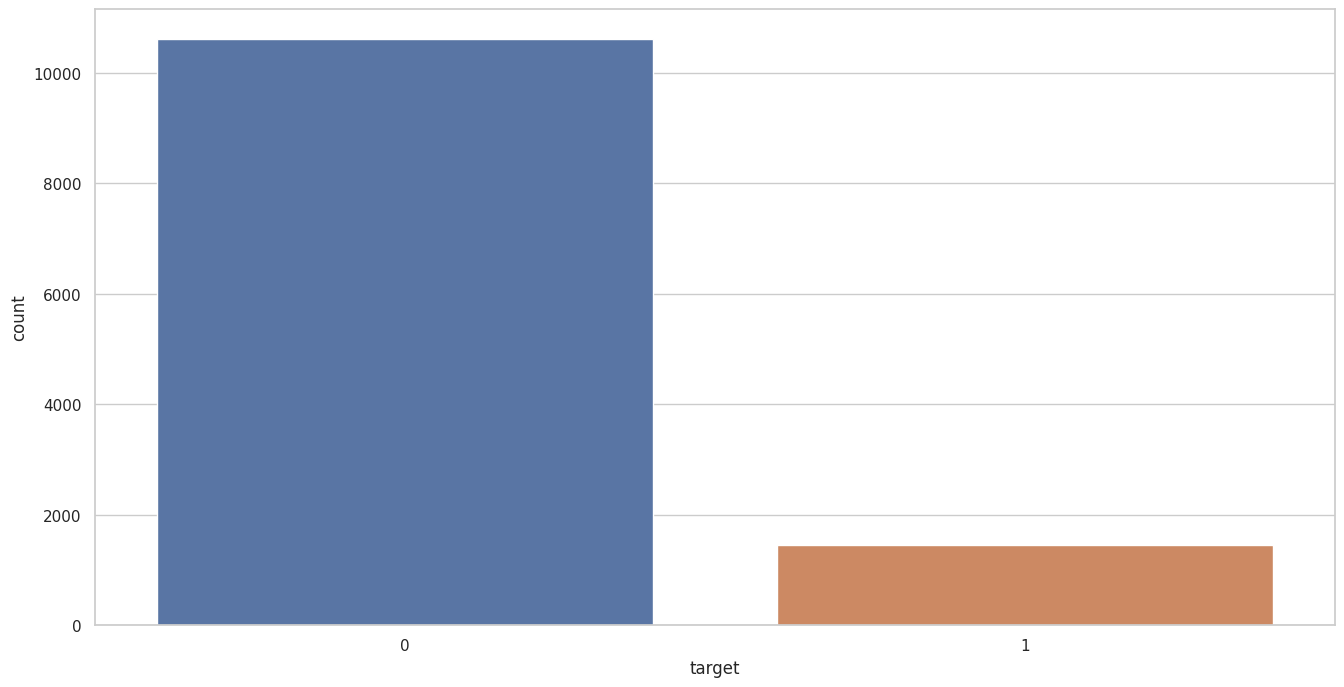

In [18]:
plt.figure(figsize=(16,8))
sns.countplot(x=train['target'])
plt.show()

### Gender

In [19]:
train['Gender'].value_counts()

Male            7976
Female          3327
Entity           277
Joint Gender     223
NOT STATED       175
NO GENDER         66
SEX               35
Name: Gender, dtype: int64

In [20]:
test['Gender'].value_counts()

Male            780
Female          352
Entity           23
NOT STATED       15
Joint Gender     15
NO GENDER        10
SEX               7
Name: Gender, dtype: int64

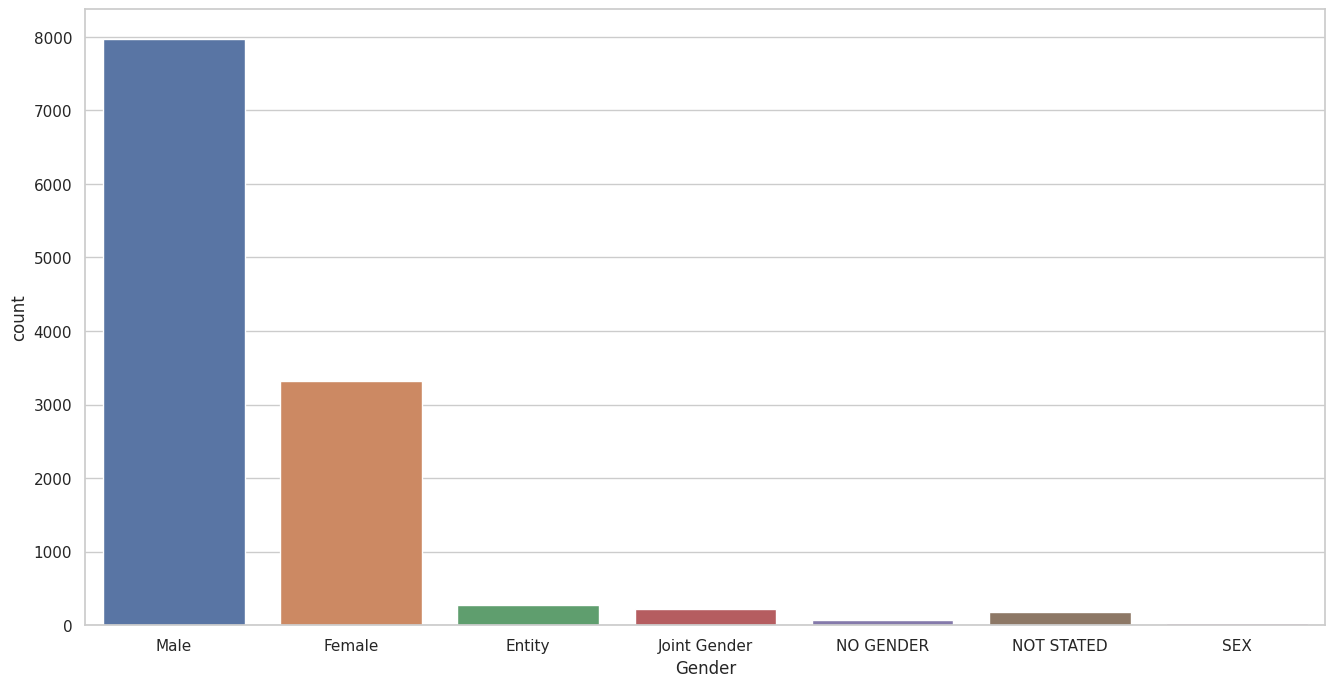

In [21]:
plt.figure(figsize=(16,8))
sns.countplot(x=train['Gender'])
plt.show()

__Question: Is there a relationship between gender and an insurance claim?__

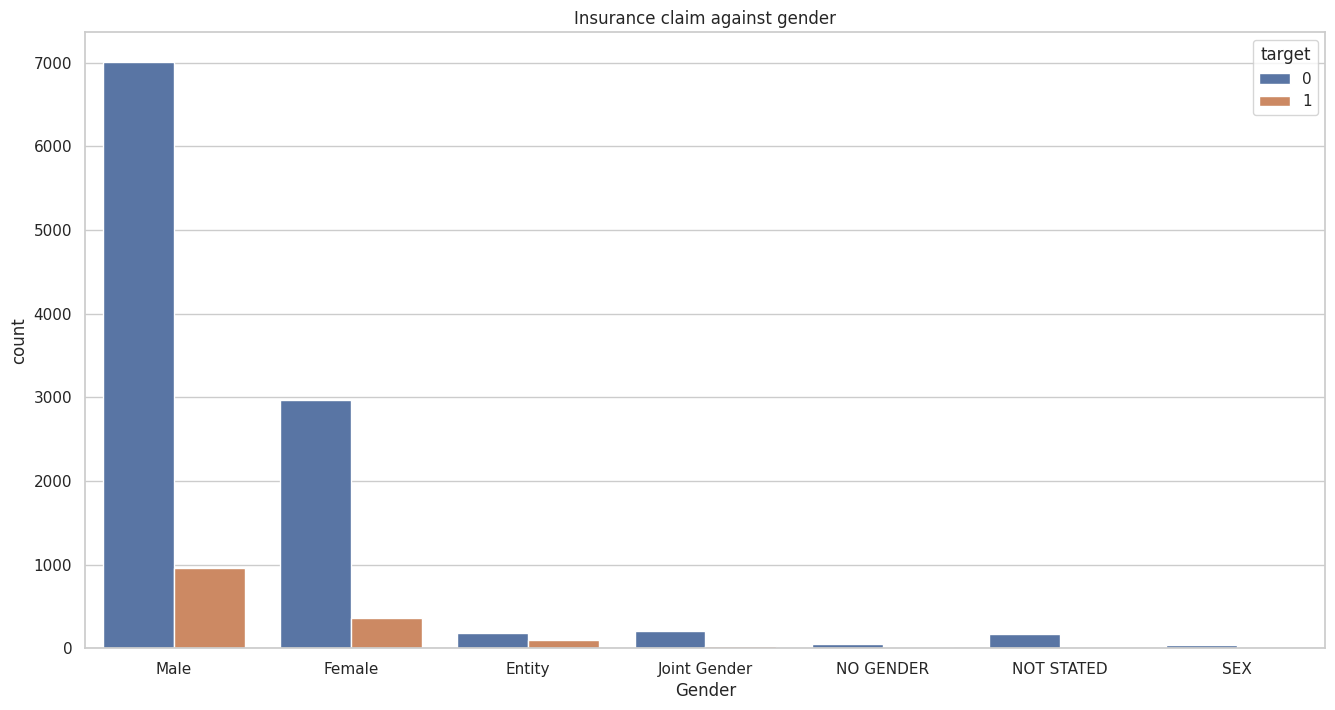

In [22]:
plt.figure(figsize=(16,8))
sns.countplot(x=train['Gender'], hue = train['target'])
plt.title("Insurance claim against gender")
plt.show()

From the countplot above, we can conclude that more males submit an insurance claim as compared to females. Hence gender affects the chance of one submitting a insurance claim in three months period.

### Car Category

In [23]:
train['Car_Category'].value_counts()

Saloon                     9772
JEEP                       2021
Truck                        97
Bus                          54
Mini Bus                     36
Pick Up                      30
Motorcycle                   17
Mini Van                     13
Sedan                        12
Wagon                        10
Shape Of Vehicle Chasis       6
Station 4 Wheel               5
Van                           3
Pick Up > 3 Tons              1
CAMRY CAR HIRE                1
Tipper Truck                  1
Name: Car_Category, dtype: int64

In [24]:
test['Car_Category'].value_counts()

Saloon              971
JEEP                202
Truck                11
Mini Bus              9
Bus                   2
Sedan                 2
Pick Up               2
Pick Up > 3 Tons      1
Motorcycle            1
Station 4 Wheel       1
Name: Car_Category, dtype: int64

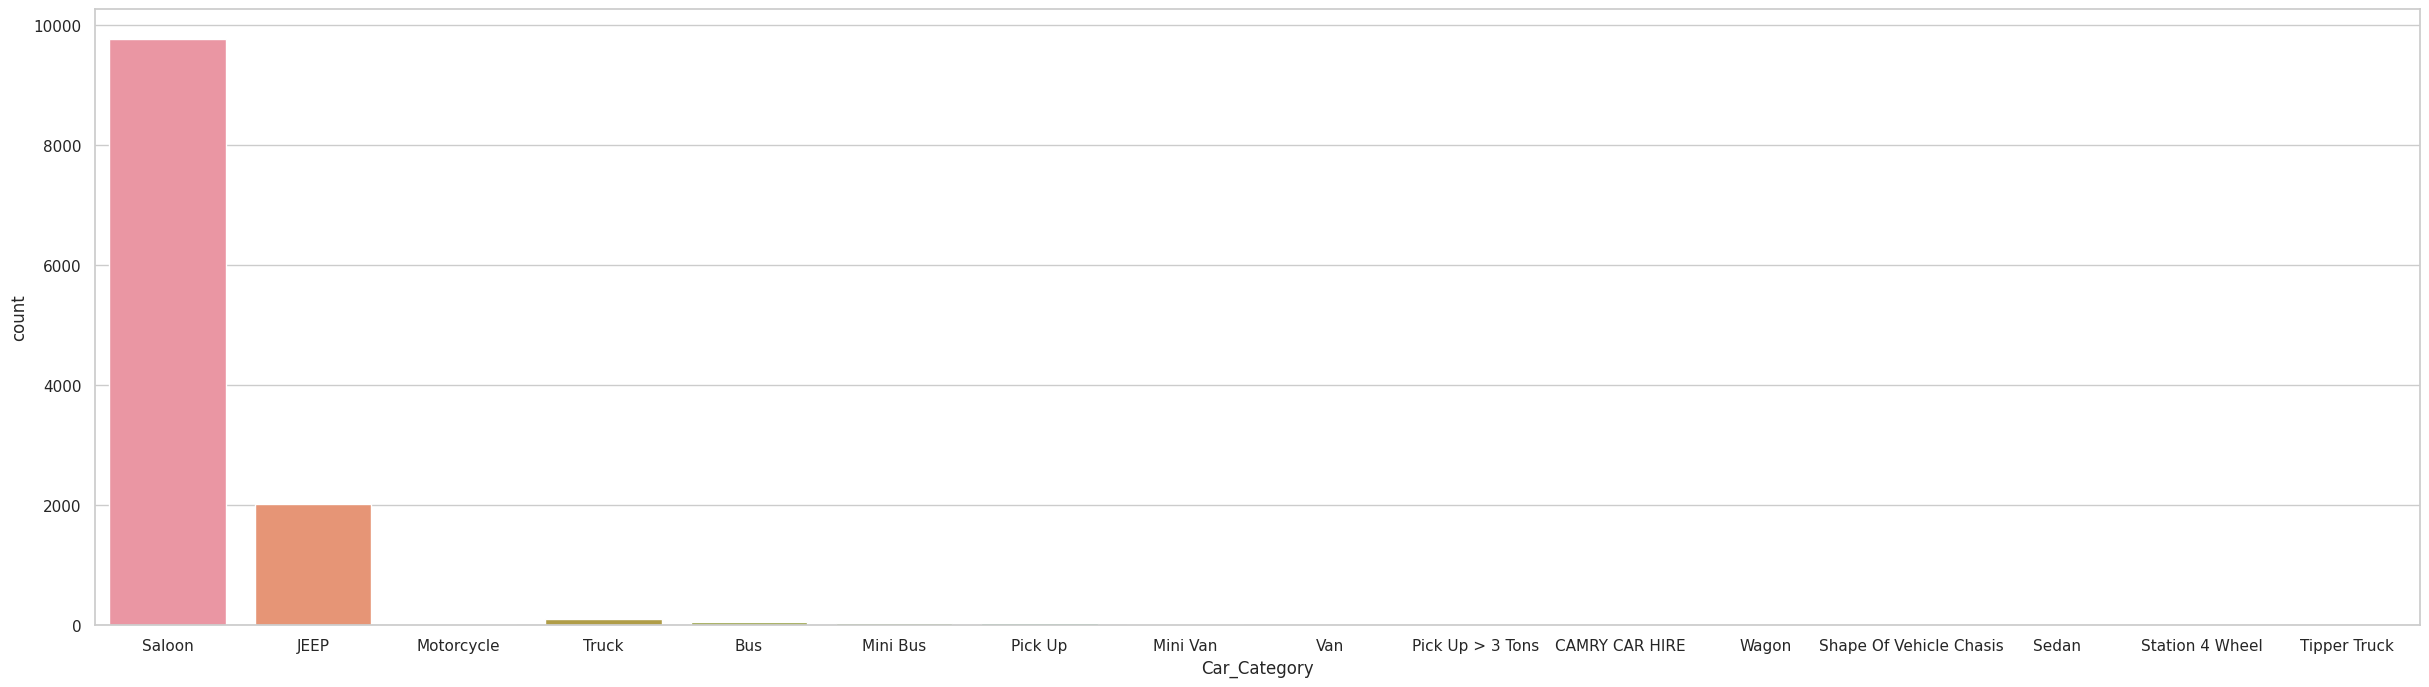

In [25]:
plt.figure(figsize=(30,8))
sns.countplot(x=train['Car_Category'])
plt.show()

__Question:  Does the car category affect the insurance claim?__


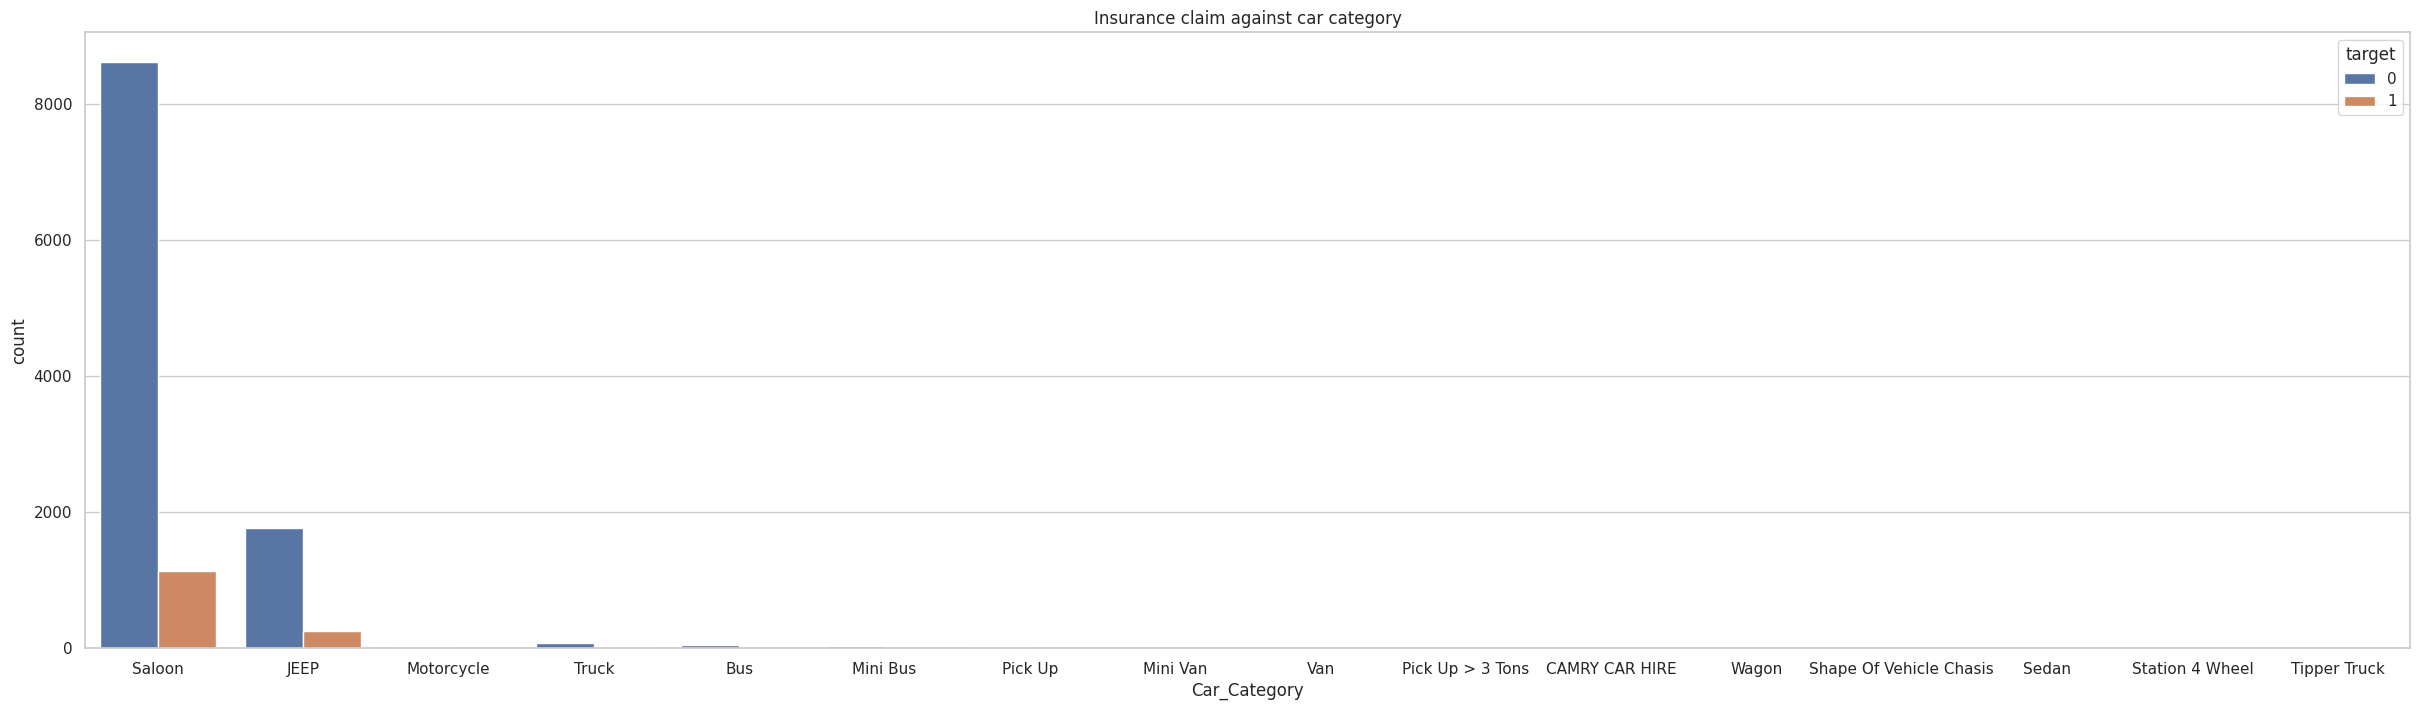

In [26]:
plt.figure(figsize=(30,8))
sns.countplot(x=train['Car_Category'], hue = train['target'])
plt.title("Insurance claim against car category")
plt.show()

From the countplots above, we can conclude that most saloon cars owners submit their insurance claim within a period of 3 months. Hence car category can affect the chances of one submitting insurance claim in a 3 months period.   

### Car Make

In [27]:
train['Subject_Car_Make'].value_counts()

TOYOTA        7451
Honda         1043
Lexus          604
Mercedes       521
Hyundai        457
              ... 
Motorcycle       1
Jincheng         1
REXTON           1
KA               1
Bajaj            1
Name: Subject_Car_Make, Length: 74, dtype: int64

In [28]:
test['Subject_Car_Make'].value_counts()

TOYOTA         739
Honda          103
Mercedes        56
Hyundai         55
Lexus           50
Kia             34
Nissan          26
Ford            24
Range Rover     12
Mitsubishi      12
Volkswagen      11
Land Rover       9
Iveco            9
Volvo            6
BMW              5
Pontiac          5
ACURA            4
Peugeot          4
.                3
Mack             3
Audi             3
Porsche          3
As Attached      3
Infiniti         3
Chevrolet        3
Subaru           2
Mazda            2
Renault          2
MINI COOPER      2
LIBERTY          2
GMC              1
Datsun           1
Skoda            1
DAF              1
Dodge            1
Suzuki           1
Opel             1
Name: Subject_Car_Make, dtype: int64

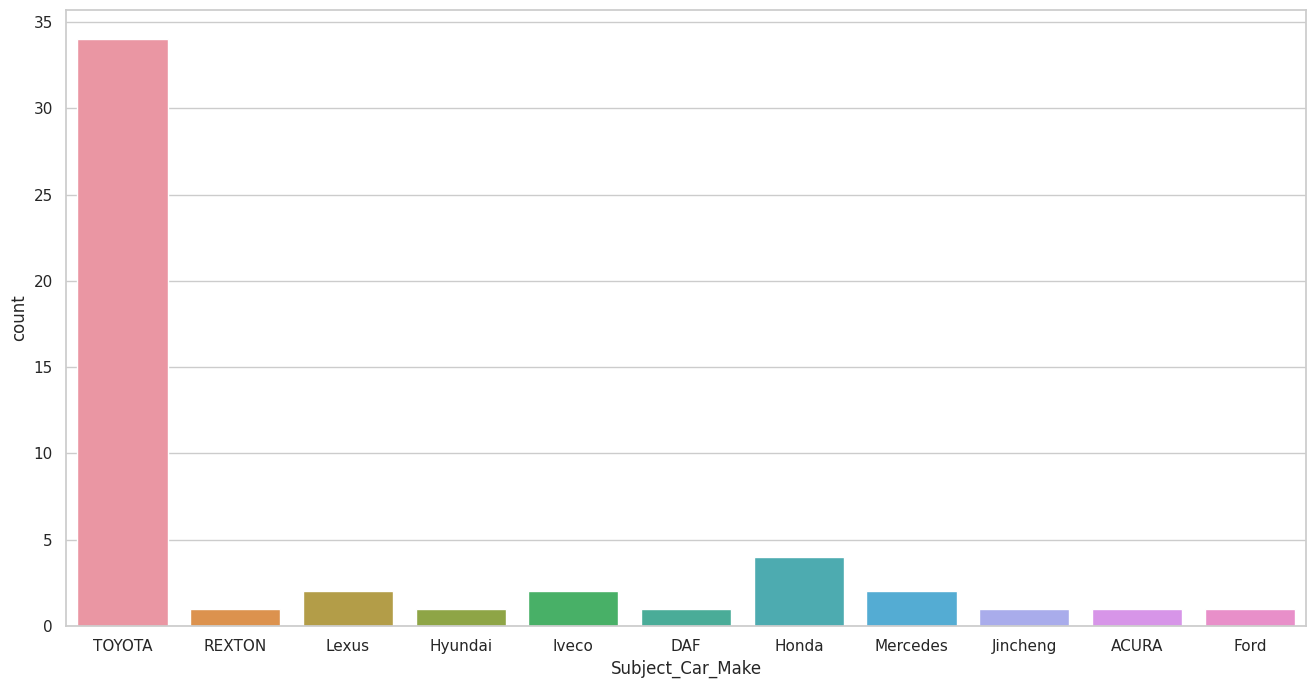

In [29]:
plt.figure(figsize=(16,8))
sns.countplot(x=train['Subject_Car_Make'].iloc[:50])
plt.show()

__Question:Does the car make affect the insurance claim?__

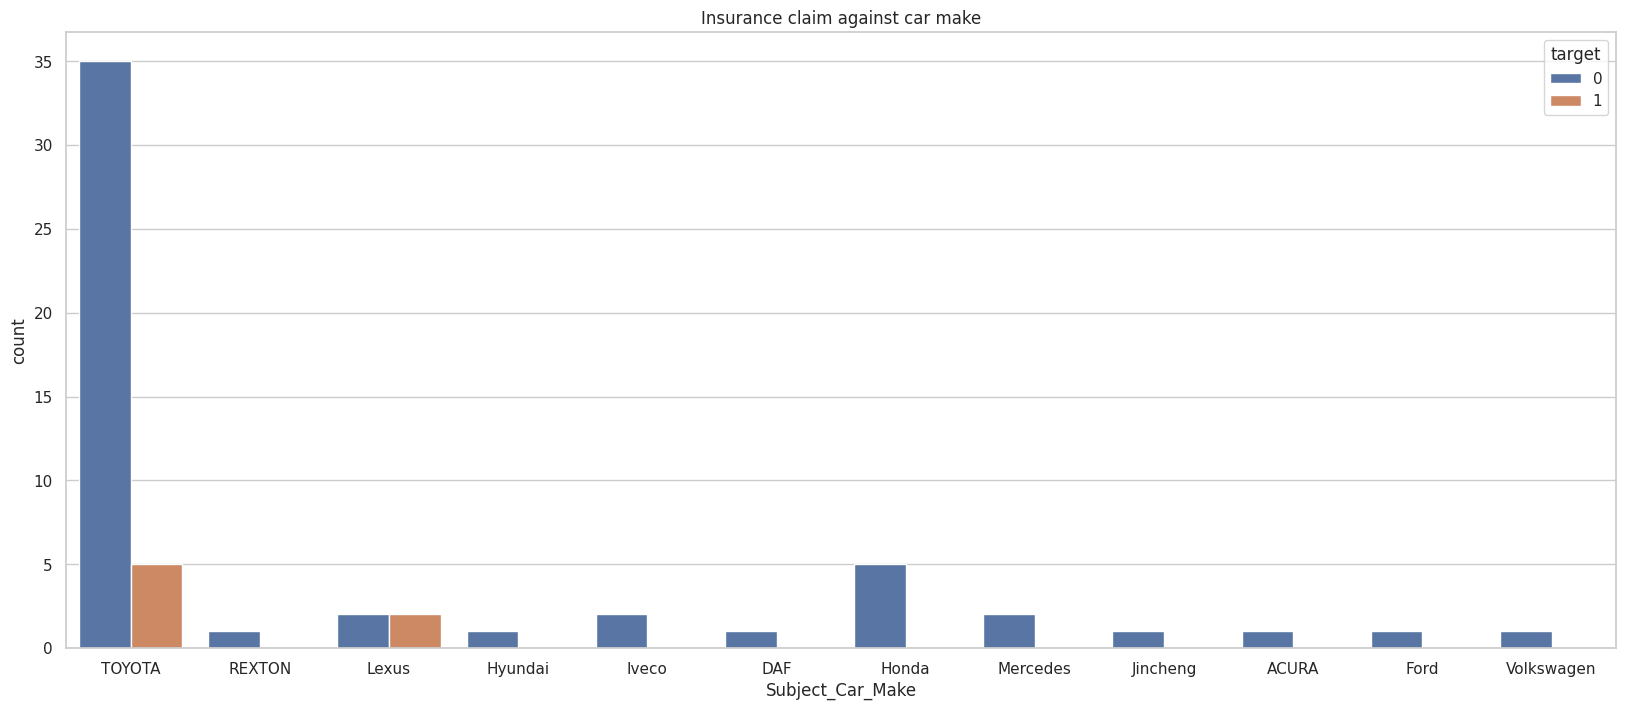

In [30]:
plt.figure(figsize=(20,8))
sns.countplot(x=train['Subject_Car_Make'].iloc[:60], hue = train['target'])
plt.title("Insurance claim against car make")
plt.show()

From the countplot above, we can conclude that lexus owners have a higher chance of submitting an insurance claim as compared to toyota owners since there is a balance between the lexus cars that require insurance after three months and the once that don't.

### City

In [31]:
train['LGA_Name'].value_counts()

Victoria Island    7638
Ikeja               401
Surulere            288
Abuja Municipal     232
Lagos Mainland      222
                   ... 
Obalende              1
AKOKO-EDO             1
Iwo                   1
Ilesha                1
Ogbomoso              1
Name: LGA_Name, Length: 258, dtype: int64

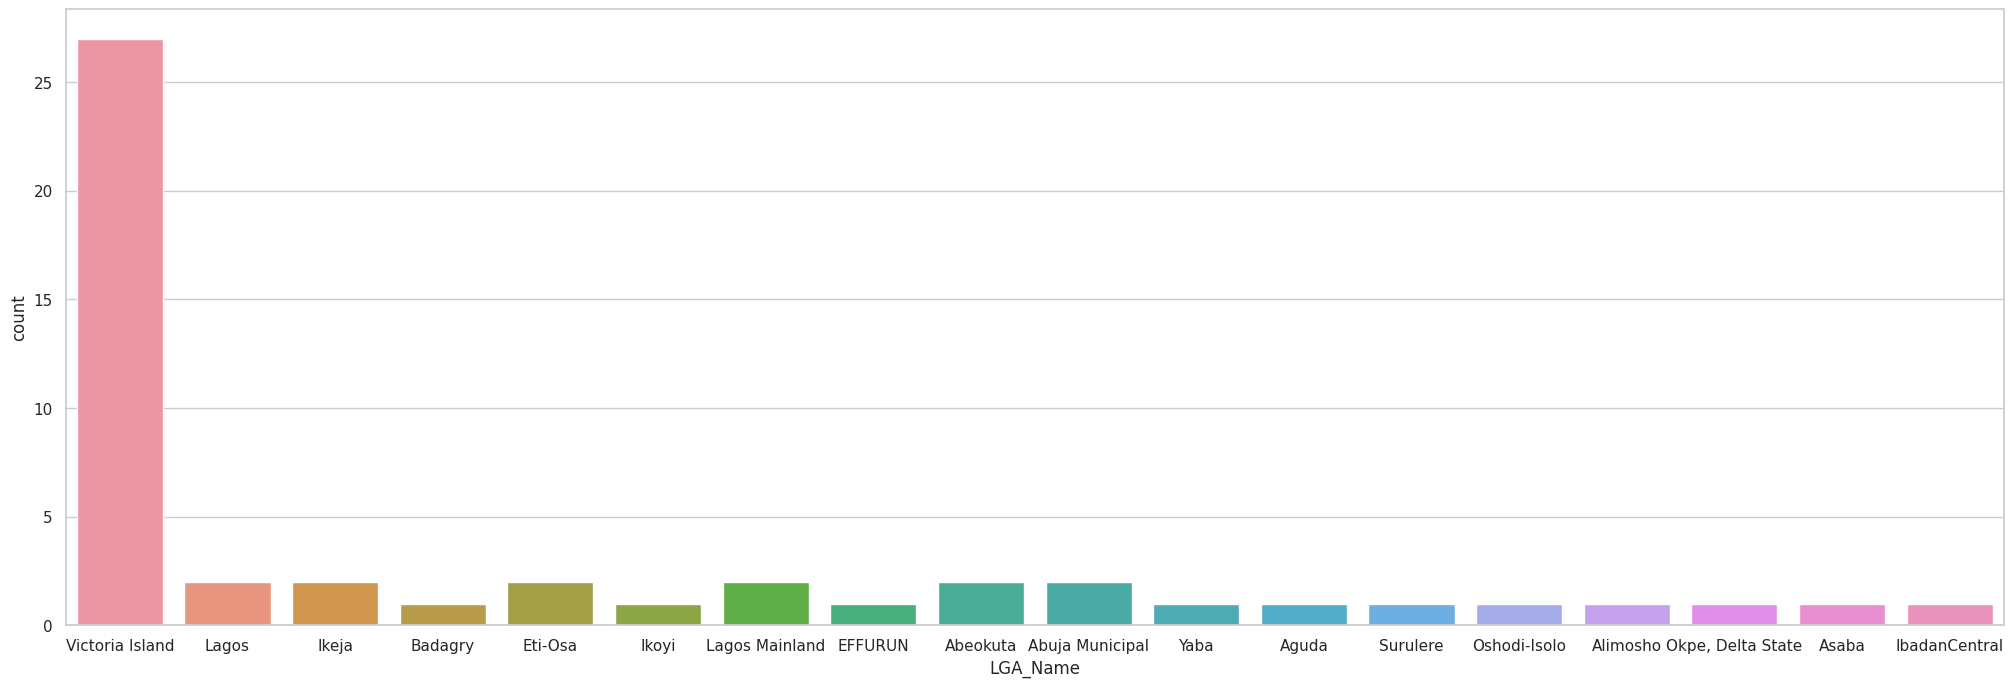

In [32]:
plt.figure(figsize=(25,8))
sns.countplot(x=train['LGA_Name'].iloc[:50])
plt.show()

__Question:Does city of the car affect the insurance claim?__

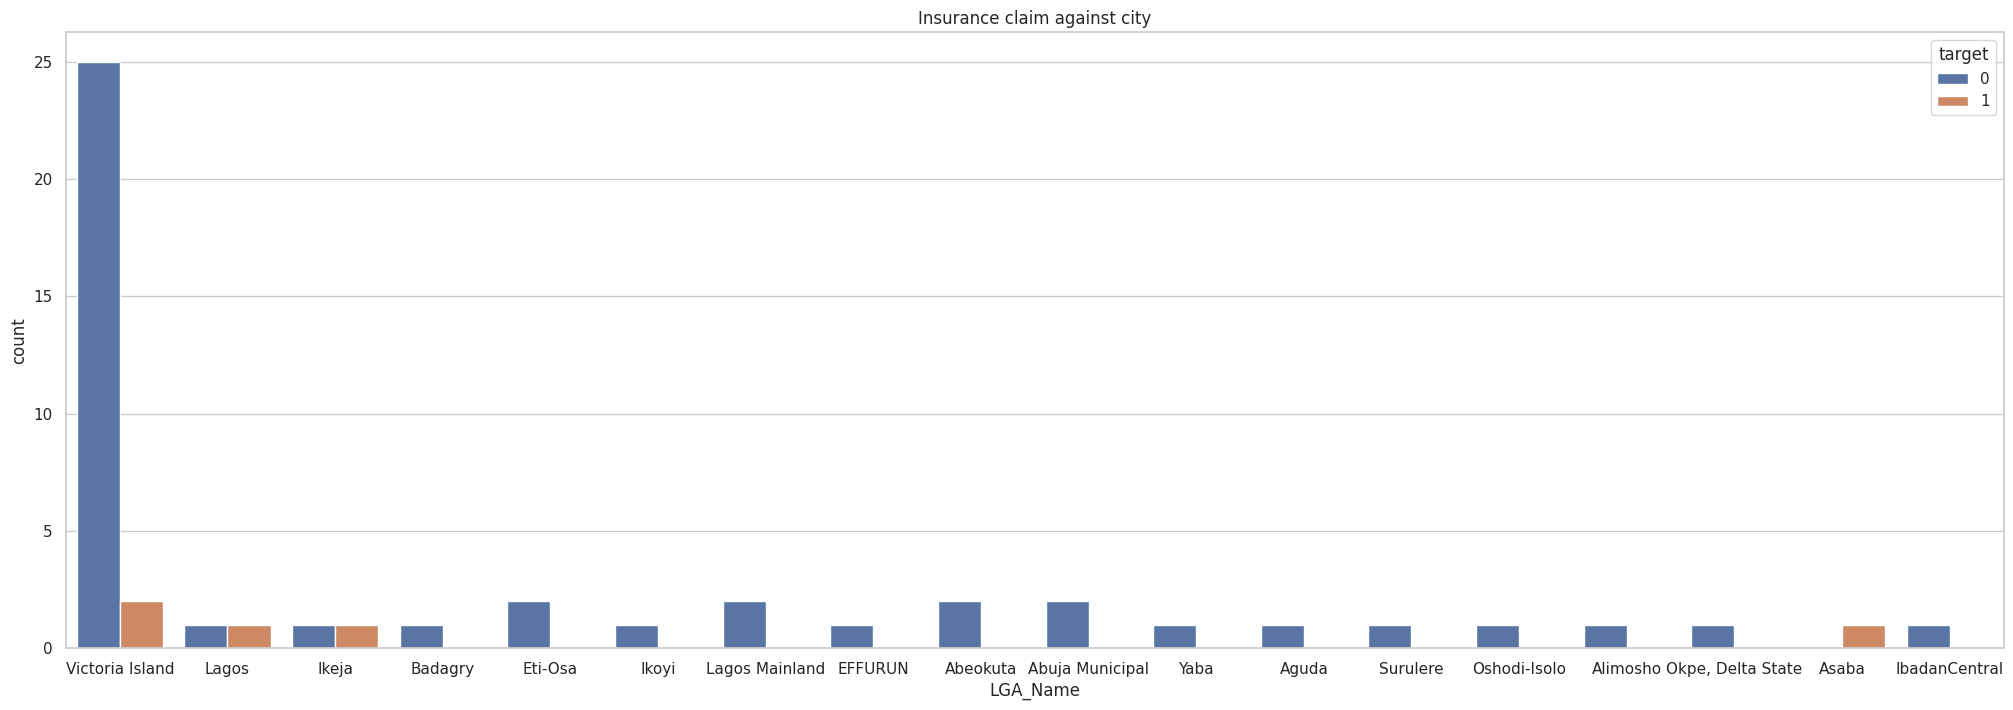

In [33]:
plt.figure(figsize=(25,8))
sns.countplot(x=train['LGA_Name'].iloc[:50], hue = train['target'])
plt.title("Insurance claim against city")
plt.show()

From the countplot above, we can conclude that lagos have a higher levels of accidents and thefts hence higher chance of submitting an insurance claim in the city as compared to Victoria Island since there is a balance between the cars that require insurance after three months in Lagos and the once that don't.

### STATE

In [34]:
train['State'].value_counts()

Lagos              9674
Benue               626
Abuja-Municipal     232
Eti-Osa             217
Ibeju-Lekki         123
                   ... 
Kebbi                 1
Ovia-SouthWest        1
Essien-Udim           1
Akoko-West            1
Asari-Toru            1
Name: State, Length: 111, dtype: int64

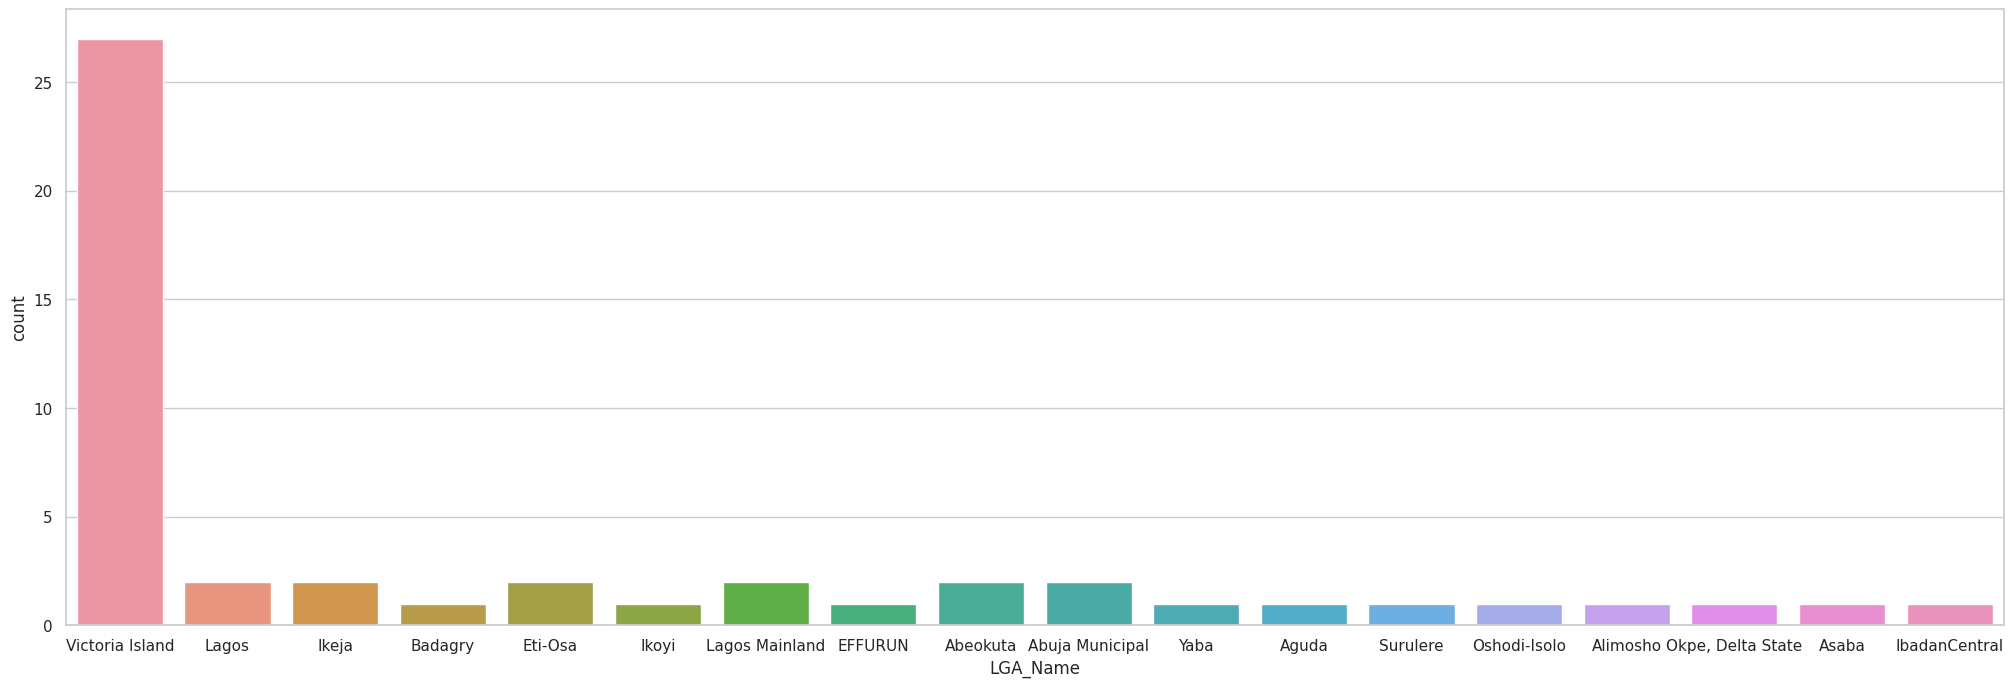

In [35]:
plt.figure(figsize=(25,8))
sns.countplot(x=train['LGA_Name'].iloc[:50])
plt.show()

__Question: Does state of the car affect the insurance claim?__

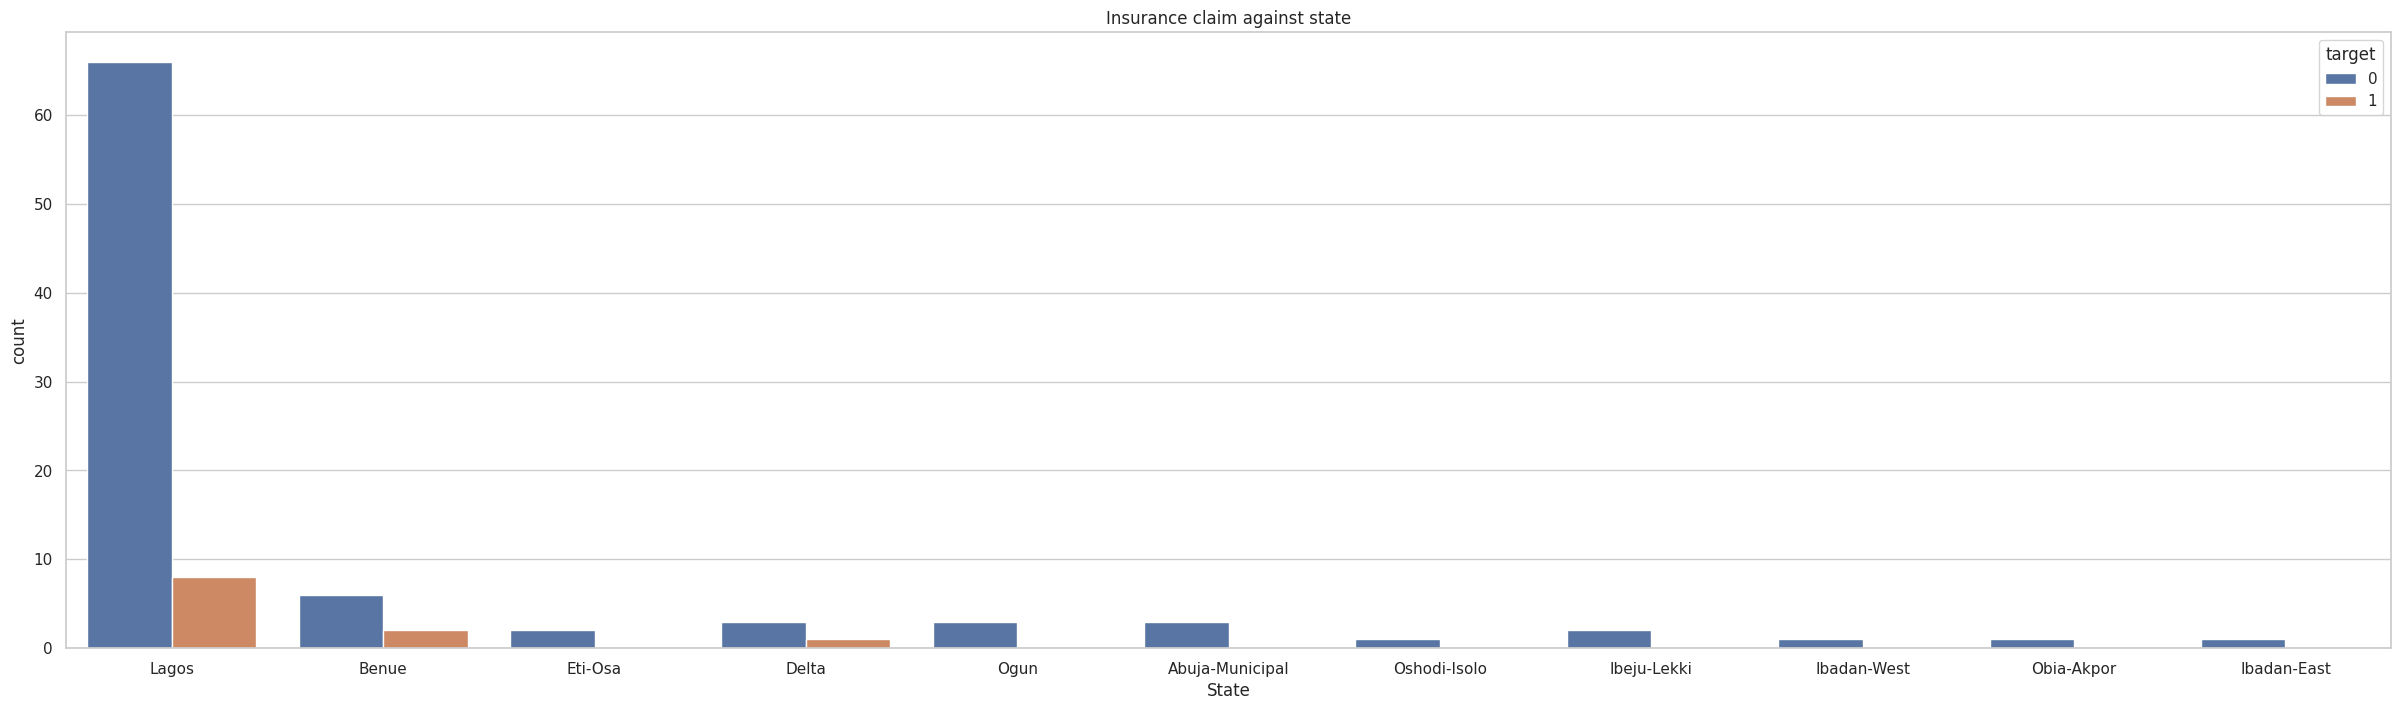

In [36]:
plt.figure(figsize=(30,8))
sns.countplot(x=train['State'].iloc[:100], hue = train['target'])
plt.title("Insurance claim against state")
plt.show()

Lagos has the highest level of accidents and thefts, a car in lagos is expected to submit a car insurance within three months period. 

### Insurance policy name

In [37]:
train['ProductName'].value_counts()

Car Classic         6485
CarSafe             3774
Customized Motor     545
Car Plus             486
CVTP                 469
CarFlex              176
Muuve                 93
Motor Cycle           46
Car Vintage            5
Name: ProductName, dtype: int64

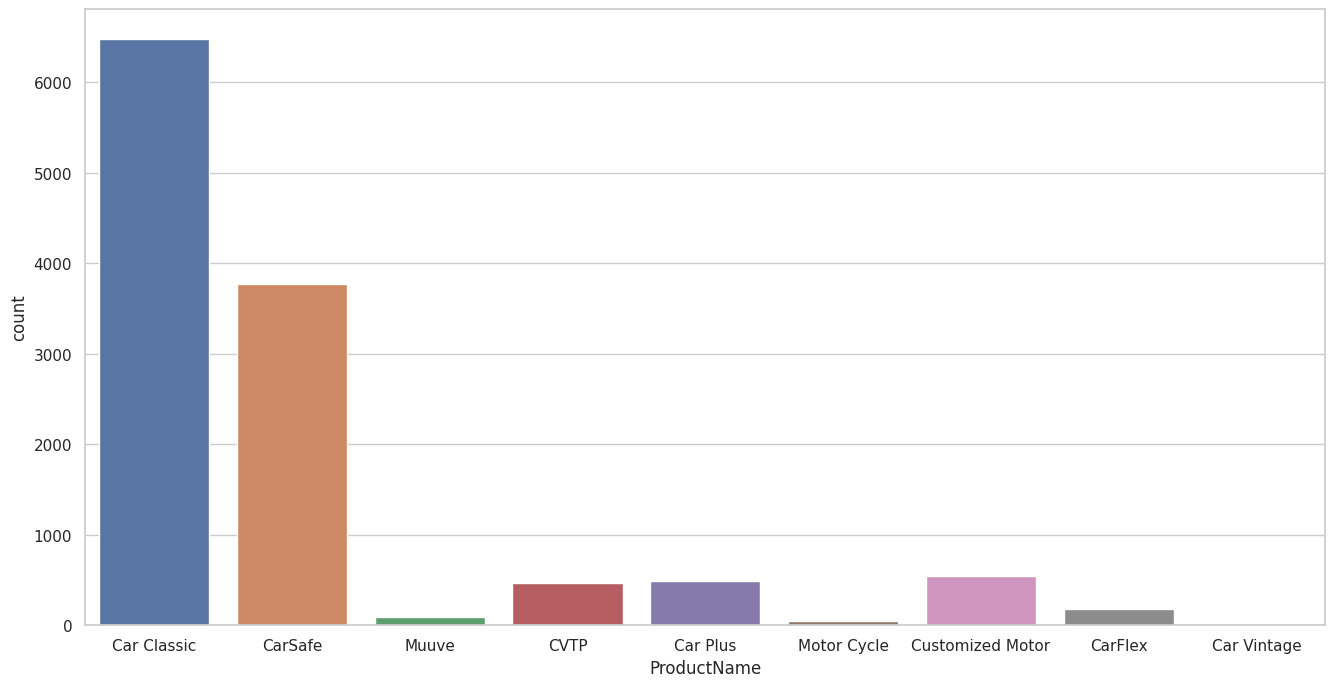

In [38]:
plt.figure(figsize=(16,8))
sns.countplot(x=train['ProductName'])
plt.show()

__Question:  Does the insurance policy affect the insurance claim?__

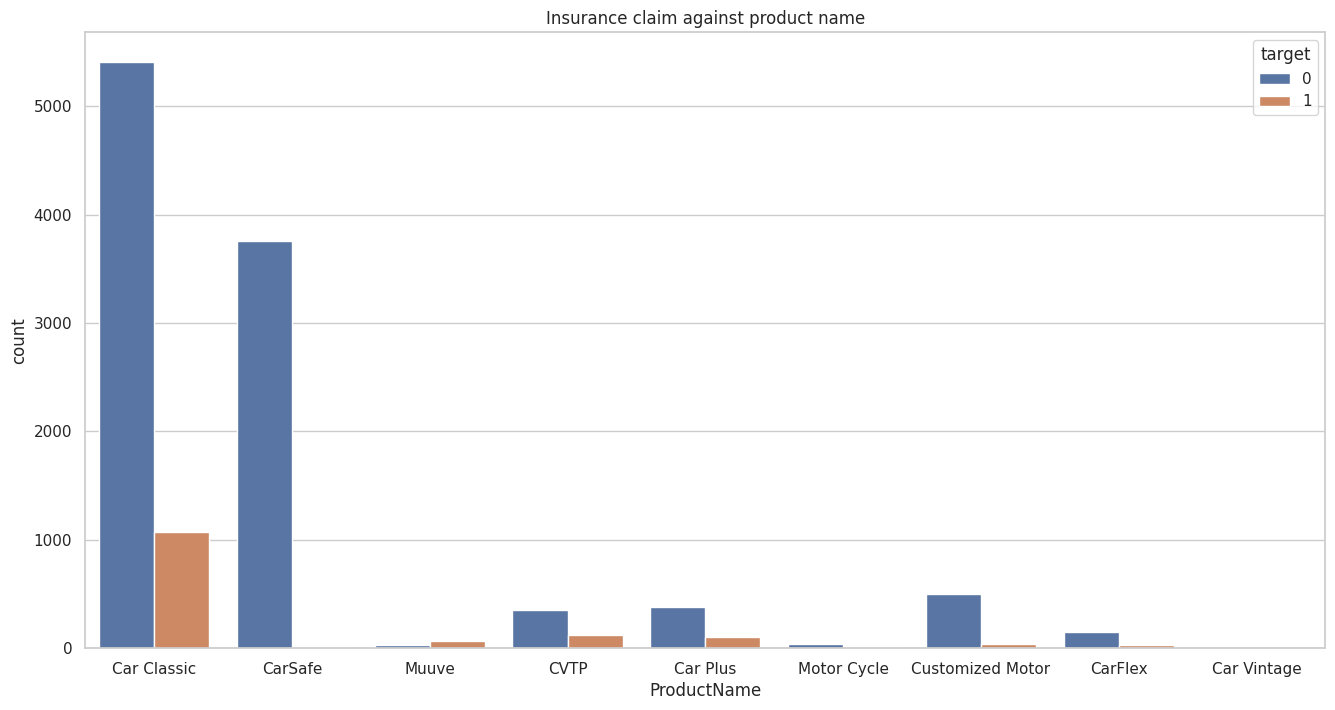

In [39]:
plt.figure(figsize=(16,8))
sns.countplot(x=train['ProductName'], hue = train['target'])
plt.title("Insurance claim against product name")
plt.show()

Cars insured by muuve have a higher chance of been involved in an accident or theft hence higher chances of submitting the insurance claim within a 3 months period. 

__2. NUMERICAL DATA__
 - For no of policy we use countplots
 - For age we use describe method

### Number of policies

In [40]:
train['No_Pol'].value_counts()

1     9580
2     1696
3      539
4      206
5       24
7       17
10       9
6        8
Name: No_Pol, dtype: int64

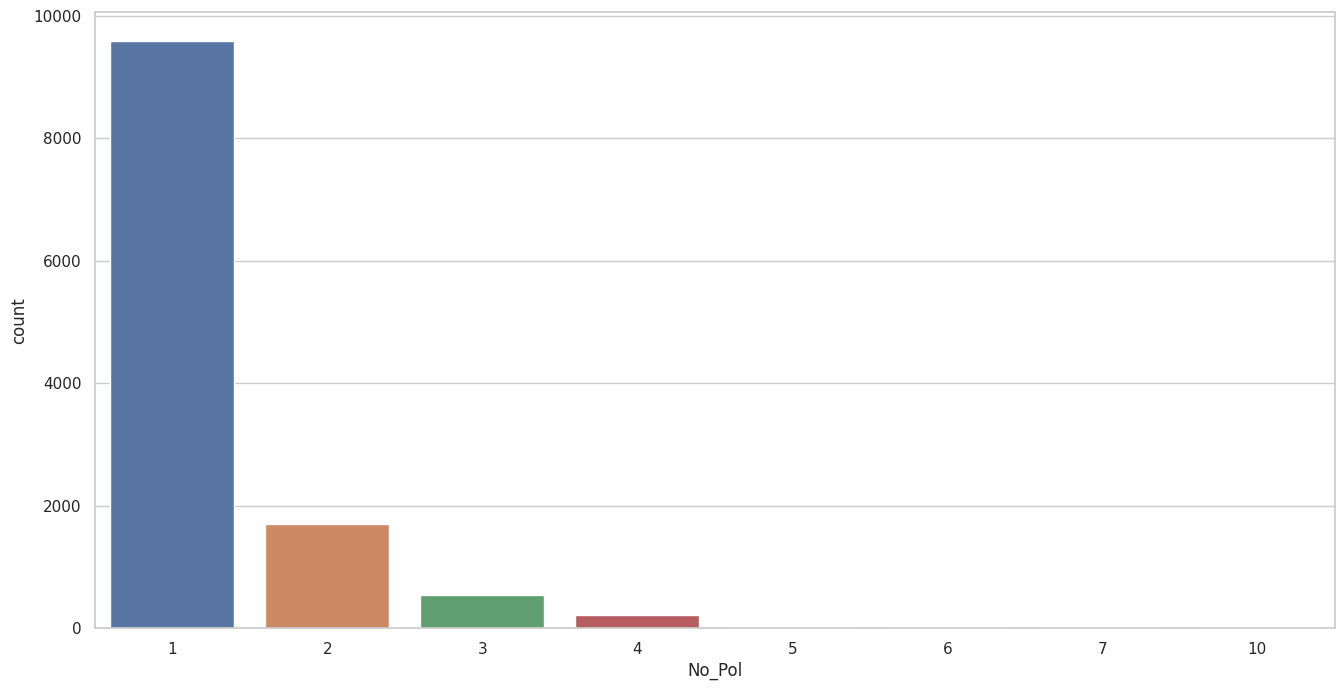

In [41]:
plt.figure(figsize=(16,8))
sns.countplot(x=train['No_Pol'])
plt.show()

__Question:Does no of policies an individual have affect the insurance claim?__

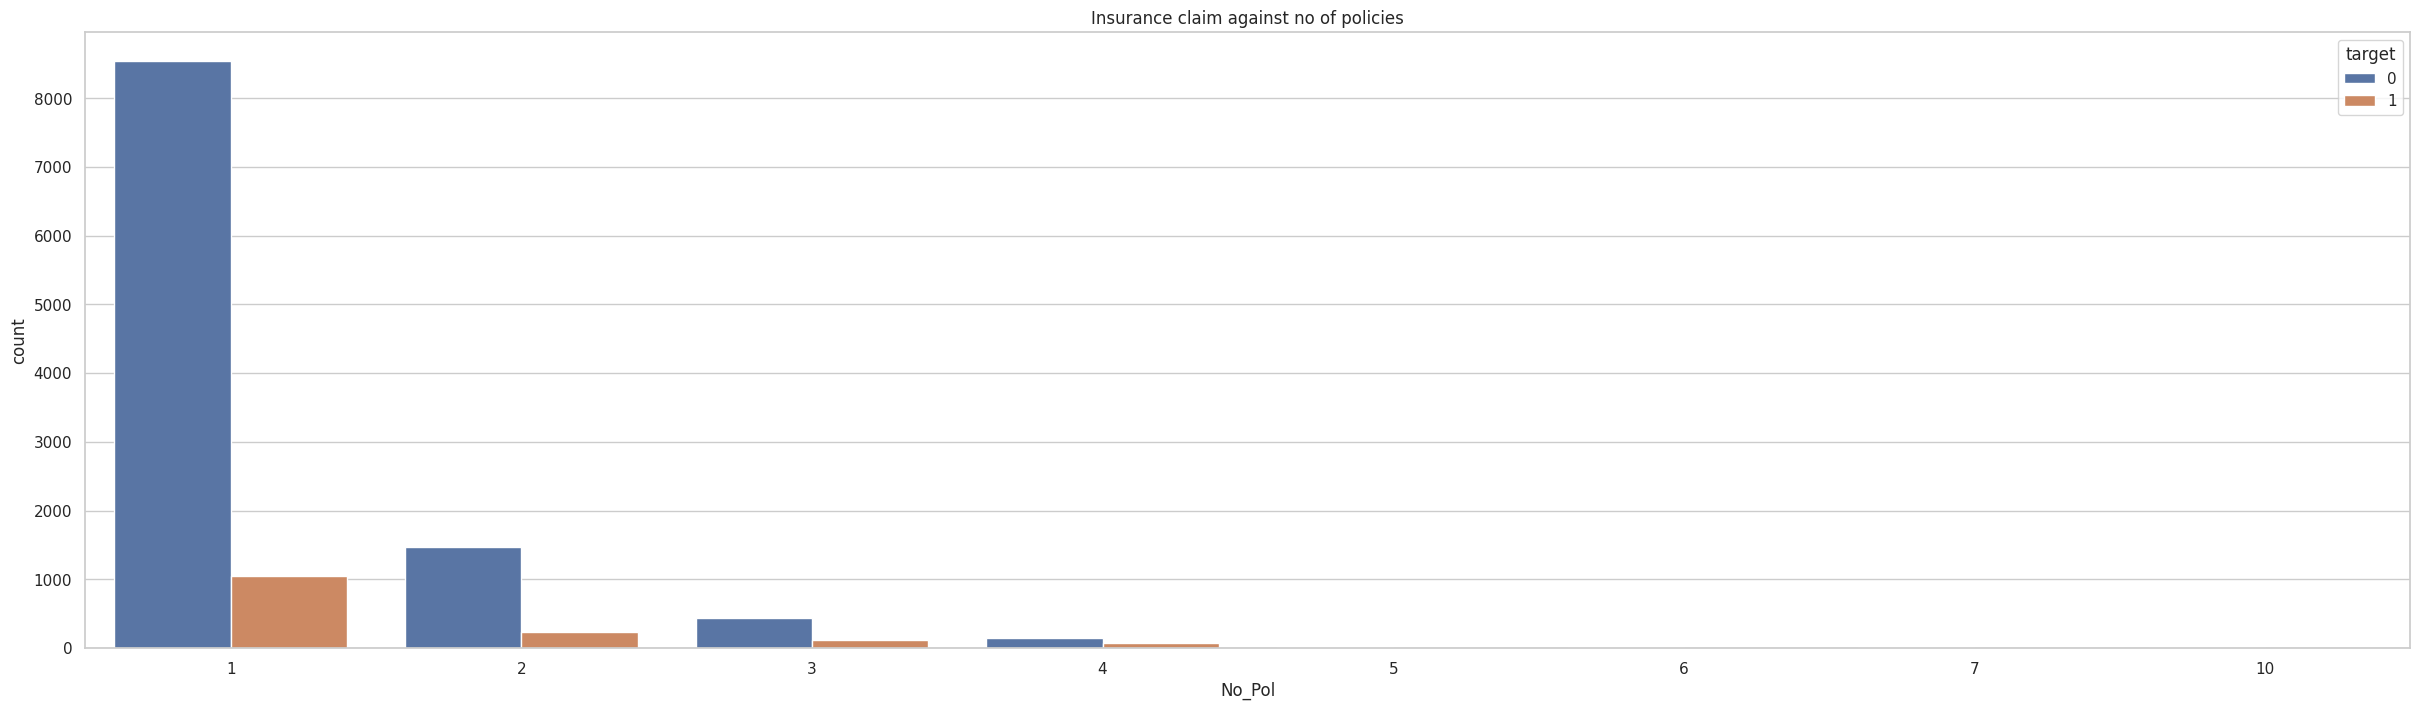

In [42]:
plt.figure(figsize=(30,8))
sns.countplot(x=train['No_Pol'], hue = train['target'])
plt.title("Insurance claim against no of policies")
plt.show()

Most individuals with one policy submit an insurance claim within the first 3 months  

### Age

In [43]:
train['Age'].describe()

count    12079.000000
mean        42.234539
std         97.492565
min      -6099.000000
25%         35.000000
50%         41.000000
75%         50.000000
max        320.000000
Name: Age, dtype: float64

__Question: Is there a relationship between age and a car insurance claim?__

From the information above, we can clearly say that individuals in the age of 42 submit their insurance claims more than other age since the mean lies at 42.23. 

### Detecting and removing outliers in age column using quantile method

In [44]:
def check_for_outlier(train):
    q1 = train['Age'].quantile(0.25)
    q3 = train['Age'].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    train = train[(train['Age']>lower_bound)&(train['Age']<upper_bound)]
    return train

### DATA PREPROCESSING

Have to subtract the policy end date and the start dates so as to get the policy duration

In [45]:
train['policy end date'] = pd.to_datetime(train['Policy End Date'])
train['policy start date'] = pd.to_datetime(train['Policy Start Date'])
train['policy duration'] = train['policy end date'] - train['policy start date']
train['policy duration']

0       364 days
1       364 days
2       364 days
3       364 days
4       124 days
          ...   
12074   364 days
12075   364 days
12076   363 days
12077   364 days
12078   364 days
Name: policy duration, Length: 12079, dtype: timedelta64[ns]

In [46]:
train['policy duration'].dtype

dtype('<m8[ns]')

In [47]:
train['policy duration'] = train['policy duration'].dt.days

In [48]:
train['policy duration'].dtype

dtype('int64')

### LABEL ENCODING

 - Used to convert categorical columns to numerical datatypes
 - Done on columns with more value counts 
 - One hot encoding is done to categorical columns that have binary values
 - From our training data we don't have a categorical column containing two value counts
 - From the dataset, the target columns has to be label encoded despite the fact that it has binary values
 - N|B when dealing with one hot encoding the no of columns may increase. At time you may be required to drop some columns e.g in gender column: we have male and female the gender_male columns that will ne created will contain 1's and 0's hence the 0's mean that it is not a male(female). You can drop the female columns since you can obtain female from male column. Remember to concatenate the new created columns to the original dataset

In [49]:
train.apply(lambda x: len(x.unique()))

Policy Start Date         376
Policy End Date           372
Gender                      7
Age                       110
First Transaction Date    376
No_Pol                      8
Car_Category               16
Subject_Car_Make           74
LGA_Name                  258
State                     111
ProductName                 9
target                      2
policy end date           372
policy start date         376
policy duration           301
dtype: int64

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le_columns = ['Gender','Car_Category' ,'Subject_Car_Make','LGA_Name','State','ProductName','target']

for col in le_columns:
    train[col] = le.fit_transform(train[col])
    
train.columns

Index(['Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category', 'Subject_Car_Make',
       'LGA_Name', 'State', 'ProductName', 'target', 'policy end date',
       'policy start date', 'policy duration'],
      dtype='object')

__Drop repeated columns__

In [51]:
train = train.drop(['Policy Start Date','Policy End Date','First Transaction Date','policy end date','policy start date'], axis=1)
train.head()

,Gender,Age,No_Pol,Car_Category,Subject_Car_Make,LGA_Name,State,ProductName,target,policy duration
0,3,30,1,8,67,247,73,1,0,364
1,1,79,1,2,67,247,73,1,1,364
2,3,43,1,8,67,247,73,1,0,364
3,3,2,1,8,67,247,73,5,0,364
4,0,20,3,8,67,157,73,8,1,124


In [52]:
train.isnull().sum()

Gender              0
Age                 0
No_Pol              0
Car_Category        0
Subject_Car_Make    0
LGA_Name            0
State               0
ProductName         0
target              0
policy duration     0
dtype: int64

### CORRELATION

<AxesSubplot:>

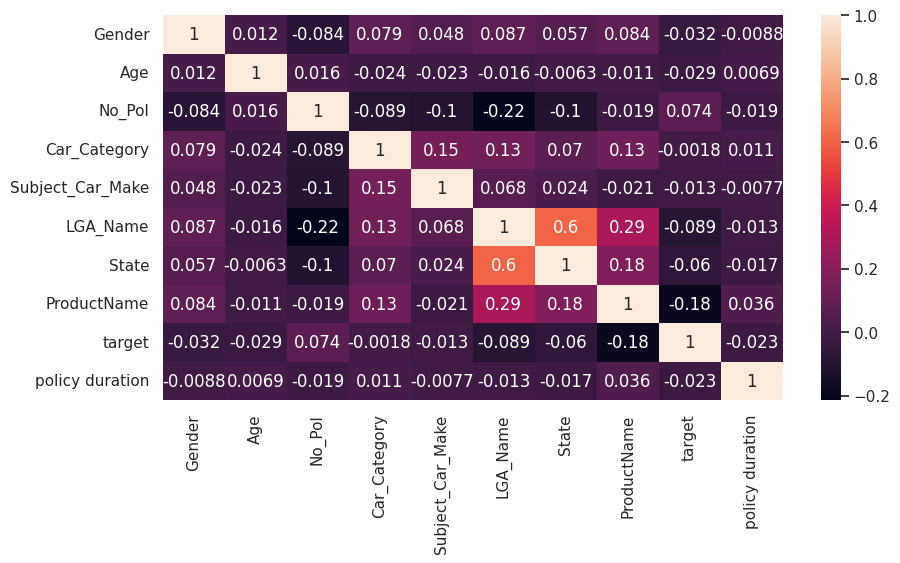

In [53]:
plt.figure(figsize=(10,5))
sns.heatmap(train.corr(), annot=True)

__Columns with negative correlation with target__

In [54]:
train.corr()['target'].sort_values()[train.corr()['target'].sort_values() < 0]

ProductName        -0.182300
LGA_Name           -0.089432
State              -0.060292
Gender             -0.031905
Age                -0.028937
policy duration    -0.022750
Subject_Car_Make   -0.012743
Car_Category       -0.001843
Name: target, dtype: float64

__Columns with positive correlation with target__

In [55]:
train.corr()['target'].sort_values()[train.corr()['target'].sort_values() > 0]

No_Pol    0.074245
target    1.000000
Name: target, dtype: float64

### FEATURE SELECTION + MODELLING

The process of selecting the best features for the model so that the predictions can be ore accurate

In [56]:
y = train['target']
y.unique()          

array([0, 1])

__Drop target variable__ 

In [57]:
train = train.drop('target', axis=1)
train.head()

,Gender,Age,No_Pol,Car_Category,Subject_Car_Make,LGA_Name,State,ProductName,policy duration
0,3,30,1,8,67,247,73,1,364
1,1,79,1,2,67,247,73,1,364
2,3,43,1,8,67,247,73,1,364
3,3,2,1,8,67,247,73,5,364
4,0,20,3,8,67,157,73,8,124


In [58]:
X = train

__Split dataset into test and train data__ 

In [59]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [60]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (8455, 9)
X_test (3624, 9)
y_train (8455,)
y_test (3624,)


__Training Random Forest Classification on Training Set__

In [61]:
clf = RandomForestClassifier(n_estimators = 12,criterion='gini', random_state= 42)

In [62]:
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=12, random_state=42)

__Predicting the test Result__

In [63]:
y_predict = clf.predict(X_test)
y_predict

array([0, 0, 0, ..., 1, 0, 0])

__Confusion Matrix__

In [64]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[2983,  201],
       [ 341,   99]])

In [65]:
accuracy_score(y_test, y_predict)

0.8504415011037527

In [66]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3184
           1       0.33      0.23      0.27       440

    accuracy                           0.85      3624
   macro avg       0.61      0.58      0.59      3624
weighted avg       0.83      0.85      0.84      3624

